IMPORTING NECESSARY PACKAGES:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

READING OF DATA:

In [ ]:
cd=pd.read_csv('/content/sample_data/Churn data.csv')

In [ ]:
cd.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
cd.tail()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


CHECKING OF BASIC ATTRIBUTES:

In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
cd.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
cd.shape

(10000, 12)

In [ ]:
cd.isnull().sum()

,0
CustomerId,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0


EVALUATION OF CATEGORICAL COLUMNS:

In [ ]:
print(cd.columns)

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
categorical_columns = cd.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['Geography', 'Gender'], dtype='object')


In [ ]:
cd['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
cd['Geography'].value_counts(normalize=True)

,proportion
Geography,
France,0.5014
Germany,0.2509
Spain,0.2477


In [ ]:
cd['Geography']=cd['Geography'].replace(['France', 'Spain', 'Germany'],[1,2,3])
pd.set_option('future.no_silent_downcasting', True)

In [ ]:
cd['Geography'].unique()

array([1, 2, 3])

In [ ]:
cd['Geography'].value_counts(normalize=True)

,proportion
Geography,
1,0.5014
3,0.2509
2,0.2477


In [ ]:
cd['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
cd['Gender']=cd['Gender'].replace(['Female', 'Male'],[1,2])

In [ ]:
cd['Gender'].unique()

array([1, 2], dtype=object)

In [ ]:
cd['Gender'].value_counts(normalize=True)

,proportion
Gender,
2,0.5457
1,0.4543


In [ ]:
X=cd.drop('Exited',axis=1)
y=cd['Exited']

SPLITTING OF DATASET INTO TRAIN AND TEST:

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,15601116,686,1,2,32,6,0.00,2,1,1,179093.26
1561,15766374,632,3,2,42,4,119624.60,2,1,1,195978.86
1670,15716994,559,2,2,24,3,114739.92,1,1,0,85891.02
6087,15730759,561,1,1,27,9,135637.00,1,1,0,153080.40
6669,15797900,517,1,2,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...,...
5734,15596647,768,1,2,54,8,69712.74,1,1,1,69381.05
5191,15681075,682,1,1,58,1,0.00,1,1,1,706.50
5390,15573851,735,1,1,38,1,0.00,3,0,0,92220.12
860,15807663,667,1,2,43,8,190227.46,1,1,0,97508.04


In [ ]:
X_test

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,15687492,596,3,2,32,3,96709.07,2,0,0,41788.37
4684,15736963,623,1,2,43,1,0.00,2,1,1,146379.30
1731,15721730,601,2,1,44,4,0.00,2,1,0,58561.31
4742,15762134,506,3,2,59,8,119152.10,2,1,1,170679.74
4521,15648898,560,2,1,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...,...
6412,15598982,602,3,1,53,5,98268.84,1,0,1,45038.29
8285,15572631,609,1,2,25,10,0.00,1,0,1,109895.16
7853,15746674,730,1,1,47,7,0.00,1,1,0,33373.26
1095,15689081,692,1,2,29,4,0.00,1,1,0,76755.99


In [ ]:
y_train

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1
...,...
5734,0
5191,0
5390,1
860,1


In [ ]:
y_test

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
6412,1
8285,0
7853,1
1095,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['Geography'] = le.fit_transform(X_train['Geography'])
X_train['Gender'] = le.fit_transform(X_train['Gender'])


In [ ]:
X_test['Geography'] = le.fit_transform(X_test['Geography'])
X_test['Gender'] = le.fit_transform(X_test['Gender'])

IMPLEMENTATION OF MACHINE LEARNING MODELS:

LOGISTIC REGRESSION:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(solver='liblinear',max_iter=500)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [ ]:
y_pred1=lr.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8035

RANDOM FOREST CLASSIFIER:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred2=rf.predict(X_test)
accuracy_score(y_test,y_pred2)

0.868

GRADIENT BOOSTING CLASSIFIER:

In [ ]:
 from sklearn.ensemble import GradientBoostingClassifier
 gbc=GradientBoostingClassifier()
 gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred3=gbc.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8625

In [ ]:
e_fd = pd.DataFrame({
    'Models': ['LR','RF', 'GB'],
    'ACC': [
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
    ]
})

In [ ]:
e_fd

,Models,ACC
0,LR,0.8035
1,RF,0.8680
2,GB,0.8625


PLOTTING THE ACCURACY OF ALL ML MODELS:


<Axes: xlabel='Models', ylabel='ACC'>

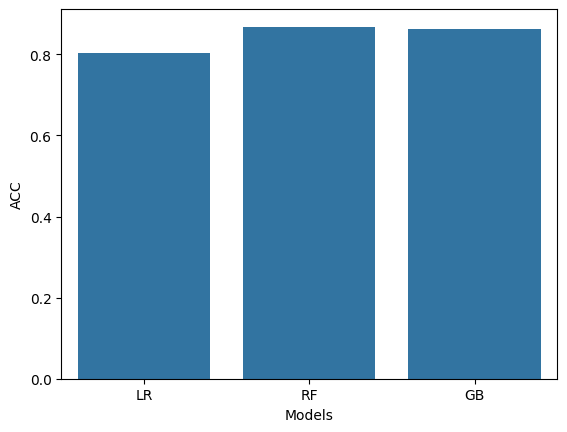

In [ ]:
sns.barplot(x='Models', y='ACC', data=e_fd)

In [ ]:
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

IMPLEMENTATION OF LOGISTIC REGRESSION TO ENTIRE DATA SET:

In [ ]:
lr=LogisticRegression(solver='liblinear',max_iter=500)
lr.fit(X,y)

LogisticRegression(max_iter=500, solver='liblinear')

IMPLEMENTATION OF RANDOM FOREST CLASSIFIER TO ENTIRE DATASET:

In [ ]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

IMPLEMENTATION OF GRADIENT BOOSTING CLASSIFIER TO ENTIRE DATA SET:

In [ ]:
 gbc=GradientBoostingClassifier()
 gbc.fit(X,y)

GradientBoostingClassifier()

PREDICTION ON THE DATA BY ML MODELS:

In [ ]:
new_data = pd.DataFrame({'CustomerId':[15647305], 'CreditScore':[625], 'Geography':[2], 'Gender':[1], 'Age':[43], 'Tenure':[10],
       'Balance':[0], 'NumOfProducts':[2], 'HasCrCard':[0], 'IsActiveMember':[0], 'EstimatedSalary':[20000]}, index=[0])

In [ ]:
p = lr.predict(new_data)
print("Prediction:", p)

Prediction: [0]


In [ ]:
p = rf.predict(new_data)
print("Prediction:", p)

Prediction: [0]


In [ ]:
p = gbc.predict(new_data)
print("Prediction:", p)

Prediction: [0]


The prediction from all models suggests customer stayed in the service from the company.